# An Example of Sensitivity Analysis on a Simple Polynomial Function with Several Variables

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

from trata.sampler import OneAtATimeSampler, FractionalFactorialSampler, LatinHyperCubeSampler, MorrisOneAtATimeSampler
import ibis.sensitivity


## Introduction

This notebook will showcase how sensitivity analysis can be used on a function with 20 input variables.
Our function of interest will be a polynomial that only acts on the first 10 variables.
Thus, we should expect that our response will not be sensitive to the last 10 variables.

In [2]:
beta1 = np.array([1, -3, 3, -2])
beta2 = np.array([-3,2,-1,2])
def poly_function(theta):
    return np.sum(beta1[np.newaxis, :] * theta[:, :4], axis=1) ** 3 + np.sum(beta2[np.newaxis, :]*theta[:,:4], axis=1)**2


In [3]:
ranges = np.array([[-3, 3]]*8)
default = np.ones(8)

In [4]:
MOAT_samples = MorrisOneAtATimeSampler.sample_points(box=ranges, num_paths=5)
MOAT_samples.shape


(45, 8)

In [5]:
MOAT_response = poly_function(MOAT_samples)
MOAT_response.shape

(45,)

In [6]:
effects = ibis.sensitivity.morris_effects(MOAT_samples, MOAT_response)
np.abs(effects).mean(axis=0)

array([ 70.82105743, 640.05313826, 686.26619483,  80.99515775,
         0.        ,   0.        ,   0.        ,   0.        ])

In [7]:
OAT_samples = OneAtATimeSampler.sample_points(box=ranges, default=default,
                                              do_oat=True, use_default=True).astype('float')
OAT_samples.shape

(17, 8)

In [8]:
OAT_response = poly_function(OAT_samples)
OAT_response.shape

(17,)

In [9]:
effects = ibis.sensitivity.one_at_a_time_effects(OAT_samples, OAT_response)
np.abs(effects).mean(axis=0)

array([ 12., 256., 305.,  78.,   0.,   0.,   0.,   0.])

In [10]:
FF_samples = FractionalFactorialSampler.sample_points(box=ranges,resolution=5).astype('float')
FF_samples.shape

(64, 8)

In [11]:
FF_response = poly_function(FF_samples)
FF_response.shape

(64,)

In [12]:
FF_model = LinearRegression().fit(FF_samples, FF_response)
FF_model.coef_

array([ 6.03000000e+02, -1.37700000e+03,  1.37700000e+03, -1.09800000e+03,
       -4.54747351e-13,  4.26325641e-13, -8.52651283e-14, -1.13686838e-13])

In [13]:
LHC_samples = LatinHyperCubeSampler.sample_points(box=ranges, num_points=500).astype('float')
LHC_samples.shape

(500, 8)

In [14]:
LHC_response = poly_function(LHC_samples)
LHC_response.shape

(500,)

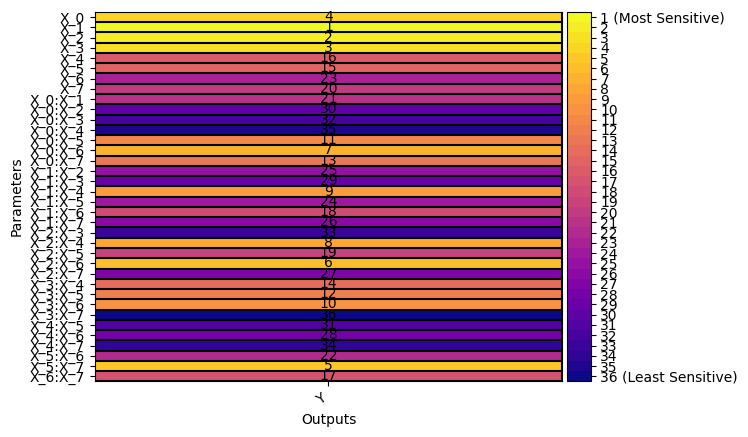

In [15]:
fig, ax = plt.subplots(1, 1)
ibis.sensitivity.f_score_rank_plot(ax, LHC_samples, LHC_response[:, np.newaxis],
                                                    ['X_{}'.format(i) for i in range(8)], ['Y'],
                                                degree=2, interaction_only=True)


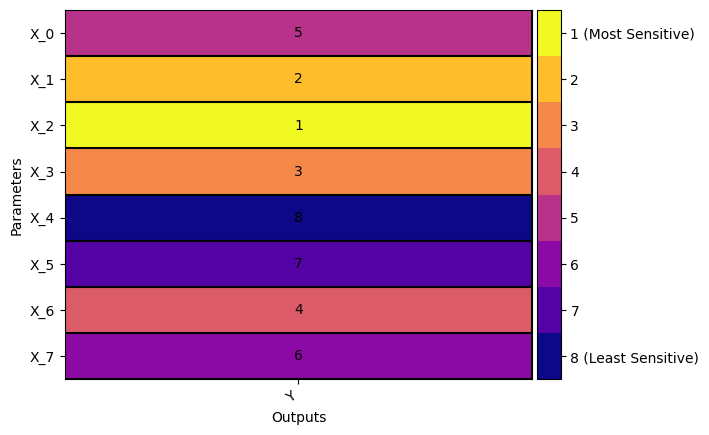

In [16]:
fig, ax = plt.subplots(1, 1)
ibis.sensitivity.mutual_info_rank_plot(ax, LHC_samples, LHC_response[:, np.newaxis],
                                                    ['X_{}'.format(i) for i in range(8)], ['Y'])


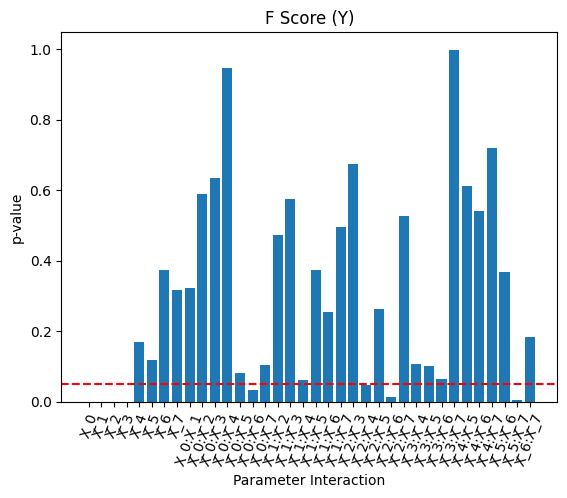

In [17]:
fig, ax = plt.subplots(1, 1)
ibis.sensitivity.f_score_plot([ax], LHC_samples, LHC_response[:, np.newaxis],
                                           ['X_{}'.format(i) for i in range(8)], ['Y'],
                                           degree=2, interaction_only=True, use_p_value=True)


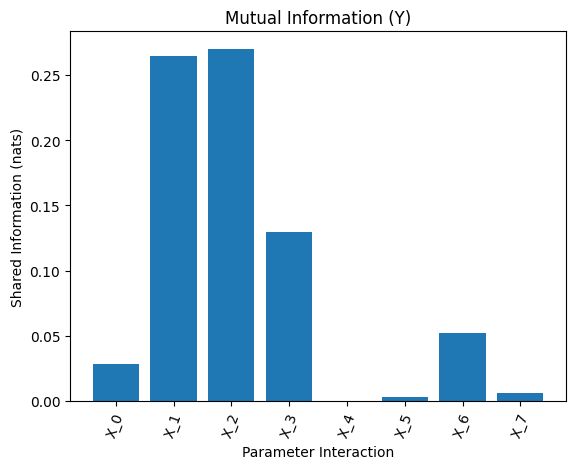

In [18]:
fig, ax = plt.subplots(1, 1)
ibis.sensitivity.mutual_info_score_plot([ax], LHC_samples, LHC_response[:, np.newaxis],
                                           ['X_{}'.format(i) for i in range(8)], ['Y'])
